In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("C:\Data science\Machine learning with phyton\data set\Wholesale customers data.csv")

In [3]:
df.shape

(440, 8)

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

• FRESH: annual spending (m.u.) on fresh products (Continuous) 
• MILK: annual spending (m.u.) on milk products (Continuous)
• GROCERY: annual spending (m.u.) on grocery products (Continuous) 
• FROZEN: annual spending (m.u.)on frozen products (Continuous)
• DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
• DELICATESSEN: annual spending (m.u.) on 
and delicatessen products (Continuous) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) 
or Retail channel (Nominal) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df=df.drop_duplicates()

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

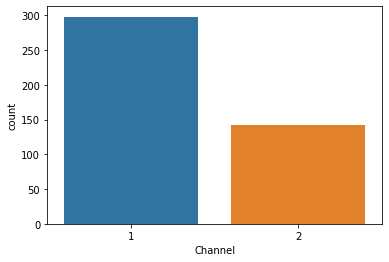

In [9]:
sns.countplot(x="Channel",data=df)
plt.show()

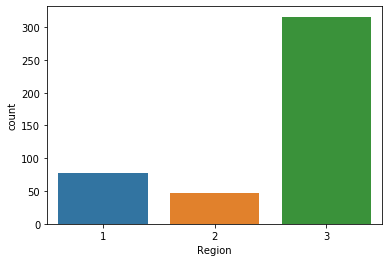

In [10]:
sns.countplot(x="Region",data=df)
plt.show()

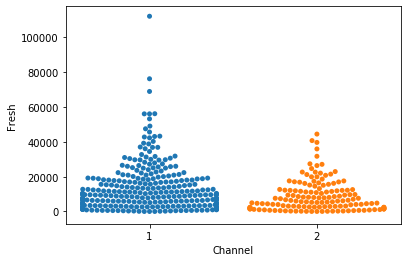

In [11]:
sns.swarmplot(x="Channel",y="Fresh",data=df)
plt.show()

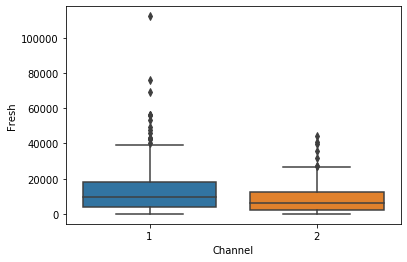

In [12]:
sns.boxplot(x="Channel",y="Fresh",data=df)
plt.show()

In [13]:
df["Fresh"].quantile(0.25)

3127.75

In [14]:
df["Fresh"].quantile(0.50)

8504.0

In [15]:
df["Fresh"].quantile(0.75)

16933.75

In [16]:
x=df[["Fresh","Milk"]]

In [17]:
from sklearn.cluster import KMeans

In [18]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
x["cluster"]=model.predict(x)

C:\Users\Anuja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
x

,Fresh,Milk,cluster
0,12669,9656,0
1,7057,9810,5
2,6353,8808,4
3,13265,1196,0
4,22615,5410,0
...,...,...,...
435,29703,12051,3
436,39228,1431,3
437,14531,15488,5
438,10290,1981,0


In [20]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    sum_distance.append(km.inertia_)

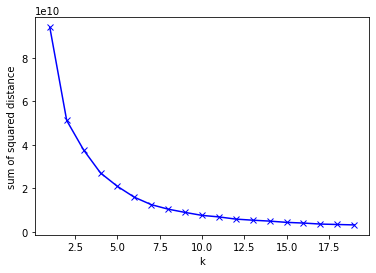

In [23]:
plt.plot(k,sum_distance,'bx-')
plt.xlabel("k")
plt.ylabel("sum of squared distance")
plt.show()

In [24]:
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[15935.05691057,  3464.28455285],
       [30445.        , 48782.66666667],
       [68409.71428571,  7298.85714286],
       [32662.97826087,  5139.7826087 ],
       [ 4334.99033816,  3598.43961353],
       [ 5073.35294118, 15669.70588235]])

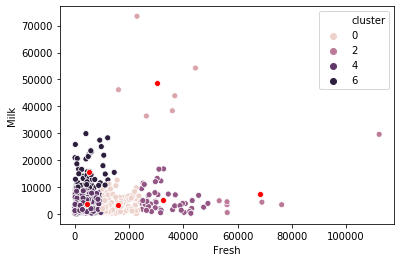

In [25]:
sns.scatterplot(x="Fresh",y="Milk",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='red')
plt.show()

In [26]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [27]:
df2=df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [28]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(df2)
    sum_distance.append(km.inertia_)

In [29]:
sum_distance

[157595857165.6091,
 113217528520.90994,
 80332413843.01636,
 65104777069.41697,
 53068852992.62751,
 47503024458.84097,
 41610550608.87103,
 36088893600.7966,
 32801884116.616123,
 30258445723.04612,
 28172408530.08807,
 26680864853.296265,
 24348161314.989143,
 22716343582.390686,
 21543751214.32878,
 20412737782.05883,
 18999800162.913425,
 17958758648.68905,
 17004602205.945438]

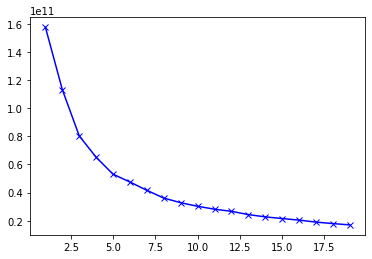

In [30]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [31]:
algo=KMeans(n_clusters=6)
algo.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
df2["cluster"]=algo.predict(df2)

C:\Users\Anuja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,5
436,39228,1431,764,4510,93,2346,5
437,14531,15488,30243,437,14841,1867,4
438,10290,1981,2232,1038,168,2125,0
